### **Finding a good fifa player**

In [1]:
# libraries
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
fifa = pd.read_csv('./datasets/fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [3]:
# scale data
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_pas'] = whiten(fifa['pas'])

scaled_features = ['scaled_pac', 'scaled_dri', 'scaled_sho', 'scaled_phy', 'scaled_def', 'scaled_pas']

                scaled_pac  scaled_dri  scaled_sho  scaled_phy  scaled_def  \
cluster_labels                                                               
0                 6.684070    8.514977    5.430915    8.334066    2.500552   
1                 5.454041    6.767575    3.668379    9.209874    3.966702   

                scaled_pas  
cluster_labels              
0                 8.455704  
1                 7.174064  


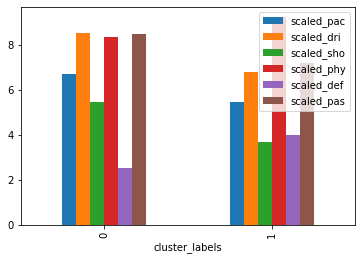

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [4]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

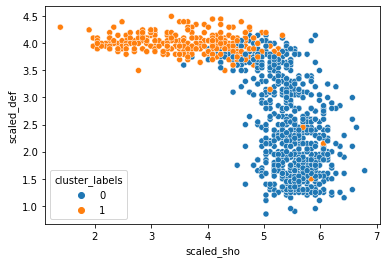

In [5]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sho', y='scaled_def', hue='cluster_labels', data=fifa)
plt.show()